# 철강데이터 분석
- PLATE_NO              플렌트 고유 ID
- ROLLING_DATE          제작일자
- SCALE                 양품/불량
- SPEC                  SPEC
- STEEL_KIND            종류
- PT_THK                두께
- PT_WDTH               너비
- PT_LTH                길이
- PT_WGT                무게
- FUR_NO                생산시설 NO
- FUR_NO_ROW            생산시설 ROW
- FUR_HZ_TEMP           가열로_HZ가열로_온도
- FUR_HZ_TIME           가열로_HZ가열로_시간
- FUR_SZ_TEMP           가열로_SZ가열로_온도
- FUR_SZ_TIME           가열로_SZ가열로_시간
- FUR_TIME              가열로_내부에 있었던 시간
- FUR_EXTEMP            가열로_추출온도
- ROLLING_TEMP_T5       롤링_온도
- HSB                   HSB 적용여부
- ROLLING_DESCALING     ROLLING_DESCALING 작업 횟수
- WORK_GR               작업그룹

In [2]:
import pandas as pd
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('eda_data.csv')
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,...,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Year,Hour,SPEC_SIZE
0,2008-08-01:00:00:15,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,...,59,282,1133,934,1,8,2조,2008-08-01,새벽,AB/EH32
1,2008-08-01:00:00:16,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,...,53,283,1135,937,1,8,2조,2008-08-01,새벽,AB/EH32
2,2008-08-01:00:00:59,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,...,55,282,1121,889,1,8,3조,2008-08-01,새벽,NV
3,2008-08-01:00:01:24,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,...,68,316,1127,885,1,8,3조,2008-08-01,새벽,NV
4,2008-08-01:00:01:44,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,...,48,314,1128,873,1,8,1조,2008-08-01,새벽,BV


## 불량률 분석
- 0 : 불량
- 1 : 양품

Text(0.5, 1.0, 'Count plot - 불량률')

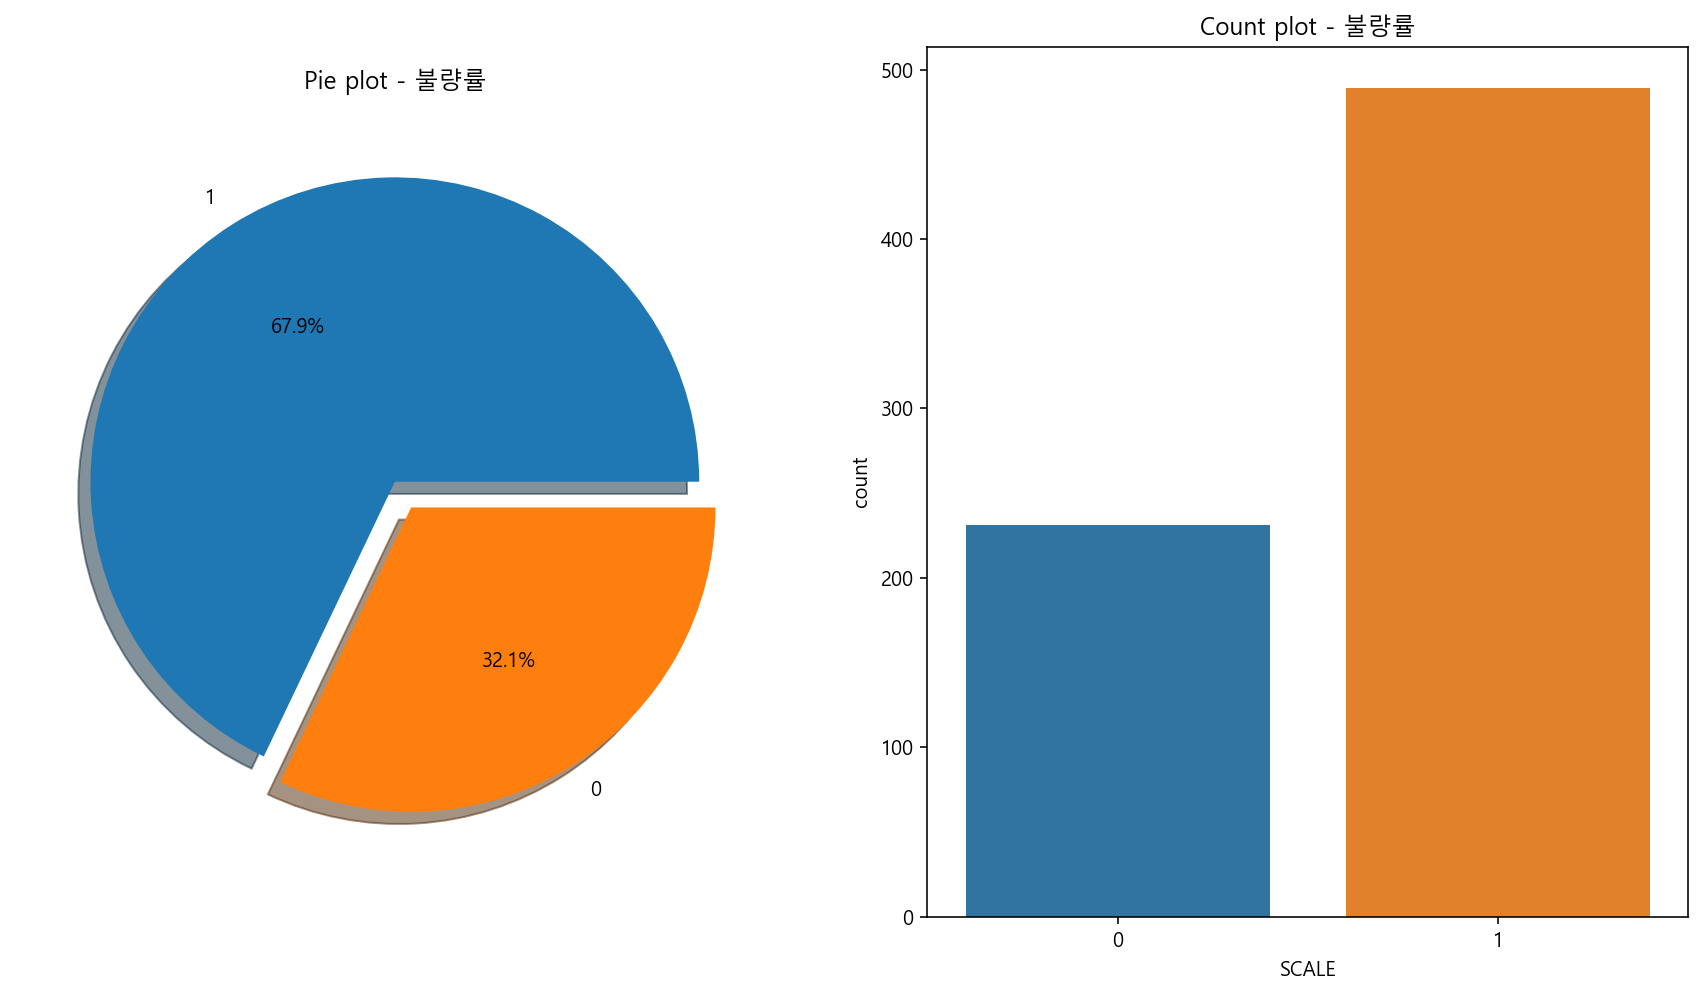

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

df['SCALE'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Pie plot - 불량률')
ax[0].set_ylabel('')
sns.countplot( data=df, x = 'SCALE', ax=ax[1])
ax[1].set_title('Count plot - 불량률')

## 호기별 생산 시각화

In [5]:
# 호기별 슬레이싱
FN_1 = df[df.copy().loc[:,'FUR_NO'] == '1호기'] # 1호기
FN_2 = df[df.copy().loc[:,'FUR_NO'] == '2호기'] # 2호기
FN_3 = df[df.copy().loc[:,'FUR_NO'] == '3호기'] # 3호기

# 호기별 불량 슬레이싱
FN_1_B = FN_1[FN_1['SCALE'] == 0] # 1호기
FN_2_B = FN_2[FN_2['SCALE'] == 0] # 2호기
FN_3_B = FN_3[FN_3['SCALE'] == 0] # 3호기

# 1호기 불량/양품/총 별 Groupby
FN_1_GS = FN_1.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
FN_1_BS = FN_1_B.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량
FN_1_TS = FN_1.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Total_count = ('SCALE', 'count')) # 총량

# 2호기 불량/양품/총 별 Groupby
FN_2_GS = FN_2.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
FN_2_BS = FN_2_B.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량
FN_2_TS = FN_2.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Total_count = ('SCALE', 'count')) # 총량

# 3호기 불량/양품/총 별 Groupby
FN_3_GS = FN_3.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
FN_3_BS = FN_3_B.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량
FN_3_TS = FN_3.groupby(['FUR_NO', 'FUR_NO_ROW'], as_index = False).agg(Total_count = ('SCALE', 'count')) # 총량

# 1호기 종합
FN_1_SC = FN_1_BS.merge(FN_1_GS, on = ['FUR_NO', 'FUR_NO_ROW'])
FN_1_SC = FN_1_SC.merge(FN_1_TS, on = ['FUR_NO', 'FUR_NO_ROW'])

# 2호기 종합
FN_2_SC = FN_2_BS.merge(FN_2_GS, on = ['FUR_NO', 'FUR_NO_ROW'])
FN_2_SC = FN_2_SC.merge(FN_2_TS, on = ['FUR_NO', 'FUR_NO_ROW'])

# 3호기 종합
FN_3_SC = FN_3_BS.merge(FN_3_GS, on = ['FUR_NO', 'FUR_NO_ROW'])
FN_3_SC = FN_3_SC.merge(FN_3_TS, on = ['FUR_NO', 'FUR_NO_ROW'])

# 총 종합
FN_SC = pd.concat([FN_1_SC, FN_2_SC, FN_3_SC])

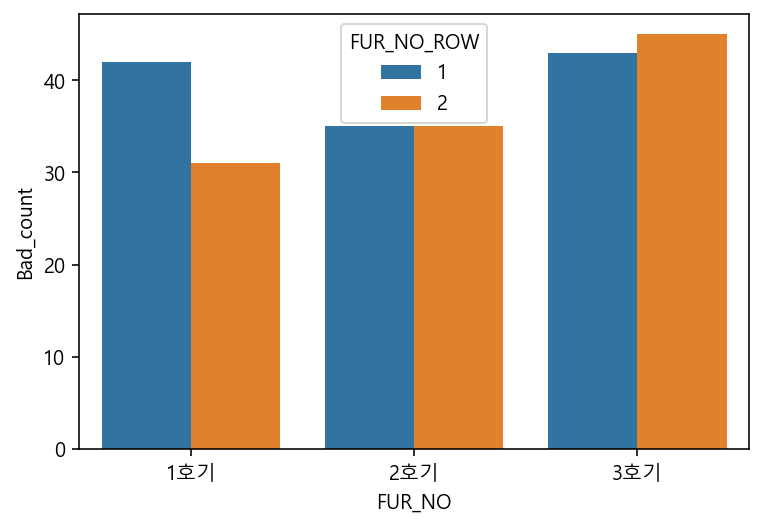

In [6]:
# 호기별 불량 생산 시각화

graph_FN_SC_B = sns.barplot(data = FN_SC, x= 'FUR_NO', y = 'Bad_count', hue = 'FUR_NO_ROW')

## 철강 종류별 불량률

In [7]:
steel_scale = df.groupby('STEEL_KIND').agg(양품정도 = ('SCALE', 'sum')).reset_index()
steel_total_scale = df.groupby('STEEL_KIND').agg(양품퍼센트 = ('SCALE', 'count')).reset_index()
steel_total_scale

,STEEL_KIND,양품퍼센트
0,C0,503
1,C1,1
2,C3,7
3,T0,16
4,T1,18
5,T3,2
6,T5,43
7,T7,35
8,T8,95


Text(0.5, 1.0, '철강 죵류에 따른 양품정도')

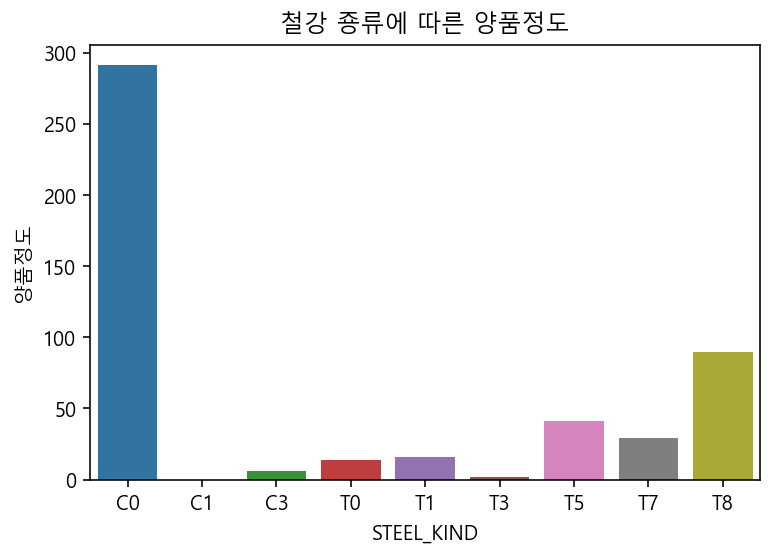

In [8]:
fig = plt.subplot()
sns.barplot(data = steel_scale, x = 'STEEL_KIND', y = '양품정도')
fig.set_title('철강 죵류에 따른 양품정도')
# C0가 압도적으로 양품이 많다. 양품이 많지만 불량률이 중요한 것 같기에 불량률 계산

In [9]:
steel_scale['양품퍼센트'] = steel_scale['양품정도'] / steel_total_scale['양품퍼센트'] * 100
steel_scale

,STEEL_KIND,양품정도,양품퍼센트
0,C0,291,57.852883
1,C1,0,0.000000
2,C3,6,85.714286
3,T0,14,87.500000
4,T1,16,88.888889
5,T3,2,100.000000
6,T5,41,95.348837
7,T7,29,82.857143
8,T8,90,94.736842


Text(0.5, 1.0, '철강 종류에 따른 양품확률')

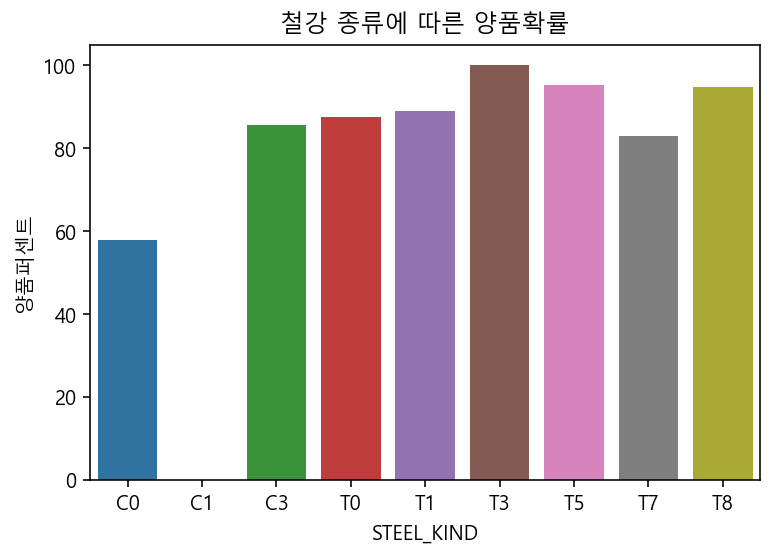

In [10]:
fig = plt.subplot()
sns.barplot(data = steel_scale, x = 'STEEL_KIND', y = '양품퍼센트')

fig.set_title('철강 종류에 따른 양품확률')

# 개수로는 양품이 C0 이많았지만, 결과적으로는 양품이 나오는 확률이 적다.
# 오히려 T3, T5, T8가 양품이 개수가 많지 않지만.

## PT 길이, 폭, 두께, 무게에 따른 불량값

In [11]:
scale_PT = df.groupby('SCALE').agg(
    THK_MEAN = ('PT_THK', 'mean'),
    WDTH_MEAN = ('PT_WDTH', 'mean'),
    LTH_MEAN = ('PT_LTH', 'mean'),
    WGT_MEAN = ('PT_WGT', 'mean')
                       ).reset_index()

Text(0.5, 1.0, '무게 평균 별 불량 수')

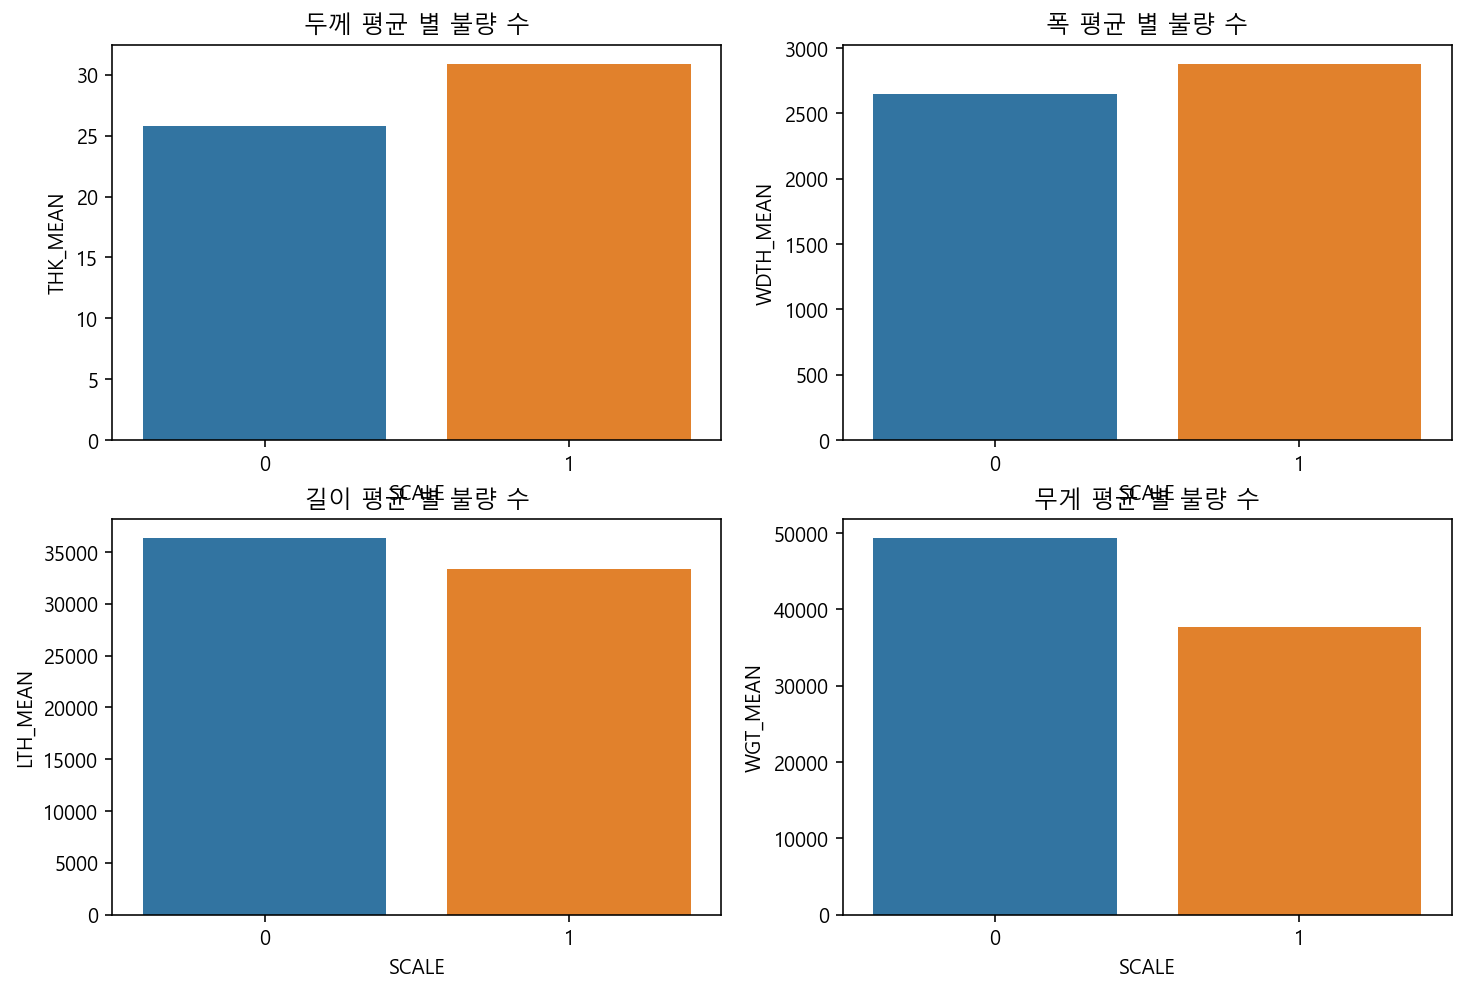

In [12]:
fig, ax = plt.subplots(2, 2,  figsize=(12, 8))

sns.barplot(data = scale_PT, x = 'SCALE', y = 'THK_MEAN', ax = ax[0][0])
ax[0][0].set_title("두께 평균 별 불량 수")

sns.barplot(data = scale_PT, x = 'SCALE', y = 'WDTH_MEAN', ax = ax[0][1])
ax[0][1].set_title("폭 평균 별 불량 수")

sns.barplot(data = scale_PT, x = 'SCALE', y = 'LTH_MEAN', ax = ax[1][0])
ax[1][0].set_title("길이 평균 별 불량 수")

sns.barplot(data = scale_PT, x = 'SCALE', y = 'WGT_MEAN', ax = ax[1][1])
ax[1][1].set_title('무게 평균 별 불량 수') 

## 작업횟수에 따른 불량률

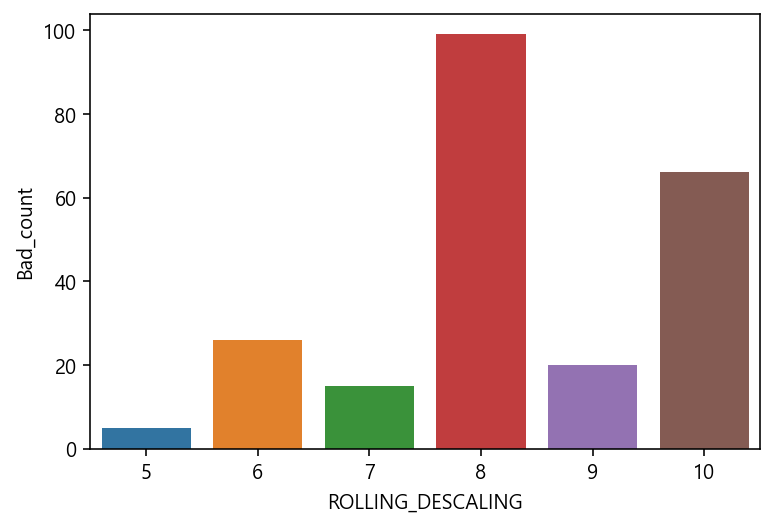

In [13]:
# SCALE별 슬레이싱
SC_1 = df[df.copy().loc[:,'SCALE'] == 1] # 양품
SC_0 = df[df.copy().loc[:,'SCALE'] == 0] # 불량
# SCLAE, ROLLING_DESCALING gruoby
SC_1_RD = SC_1.groupby(['ROLLING_DESCALING'], as_index = False).agg(Good_count = ('SCALE', 'sum')) # 양품
SC_0_RD = SC_0.groupby(['ROLLING_DESCALING'], as_index = False).agg(Bad_count = ('SCALE', 'count')) # 불량

# ROLLING_DESCALING별 불량 생산 시각화
graph_SC_0_RD = sns.barplot(data = SC_0_RD, x= 'ROLLING_DESCALING', y = 'Bad_count')

In [17]:
# C0와 C0 제외 DataFrame 만들기
c0 = pd.DataFrame(df[df['STEEL_KIND'] == 'C0'])
c0_except = pd.DataFrame(df[df['STEEL_KIND'] != 'C0'])
# C0 X, Y 값을 나누기
c0_X = pd.DataFrame(df[df['STEEL_KIND'] == 'C0'].drop(['SCALE', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 
                                                       'FUR_NO', 'WORK_GR', 'Year', 'SPEC_SIZE'], axis= 1))
c0_Y = pd.DataFrame(c0['SCALE'])
# C0 제외 한 X, Y 값을 나누기
c0_except_X = pd.DataFrame(c0_except.drop(['SCALE', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 
                                           'FUR_NO', 'WORK_GR', 'Year', 'SPEC_SIZE'], axis= 1))
c0_except_Y = pd.DataFrame(c0_except['SCALE'])
# total의 X,Y 값을 나누기
X = pd.DataFrame(df.drop(['SCALE', 'ROLLING_DATE', 'SPEC', 'STEEL_KIND', 
                          'FUR_NO', 'WORK_GR', 'Year', 'SPEC_SIZE'], axis= 1))
Y = pd.DataFrame(df['SCALE'])

def change_hour(hour):
    if hour == "새벽":
        return 0
    elif hour == "오전":
        return 1
    elif hour == "오후":
        return 2
    else:
        return 3
df["Hour"] = df['Hour'].apply(change_hour)
# 새벽 : 0
# 오전 : 1
# 오후 : 2
# 저녁 : 3

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Total의 RandomForest
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

# MinMaxScaler로 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_MinMax = scaler.transform(X_train)
X_test_MinMax = scaler.transform(X_test)

# RandomForest 설정
rf = RandomForestClassifier(max_depth = 4,
                                n_estimators=200)
rf.fit(X_train_MinMax, Y_train['SCALE'].ravel())

# 예측값
pred_rf = rf.predict(X_test_MinMax)

#정확도 계산
rf_train_score = rf.score(X_train_MinMax, Y_train['SCALE'].ravel())
rf_test_score = rf.score(X_test_MinMax, Y_test['SCALE'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {int(round(rf_train_score,2)*100)}% 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {int(round(rf_test_score,2)*100)}% 입니다.')

랜덤포레스트 훈련 정확도는 96% 입니다.
랜덤포레스트 테스트 정확도는 96% 입니다.


In [19]:
# C0의 RandomForest
X_train, X_test, Y_train, Y_test = train_test_split(c0_X,c0_Y, test_size = 0.3, random_state = 5)

# MinMaxScaler로 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_MinMax = scaler.transform(X_train)
X_test_MinMax = scaler.transform(X_test)

# RandomForest 설정
c0_rf = RandomForestClassifier(max_depth = 5,
                                n_estimators=200)
c0_rf.fit(X_train_MinMax, Y_train['SCALE'].ravel())

# 예측값
pred_c0_rf = c0_rf.predict(X_test_MinMax)

#정확도 계산
c0_rf_train_score = c0_rf.score(X_train_MinMax, Y_train['SCALE'].ravel())
c0_rf_test_score = c0_rf.score(X_test_MinMax, Y_test['SCALE'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {int(round(c0_rf_train_score,2)*100)}% 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {int(round(c0_rf_test_score,2)*100)}% 입니다.')

랜덤포레스트 훈련 정확도는 97% 입니다.
랜덤포레스트 테스트 정확도는 95% 입니다.


In [20]:
# C0 제외한 나머지의 RandomForest
X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X,c0_except_Y, test_size = 0.3, random_state = 5)

# MinMaxScaler로 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_MinMax = scaler.transform(X_train)
X_test_MinMax = scaler.transform(X_test)

# RandomForest 설정
c0_except_rf = RandomForestClassifier(max_depth = 3,
                                n_estimators=200)
c0_except_rf.fit(X_train_MinMax, Y_train['SCALE'].ravel())

# 예측값
pred_rf = c0_except_rf.predict(X_test_MinMax)

#정확도 계산
c0_except_rf_train_score = c0_except_rf.score(X_train_MinMax, Y_train['SCALE'].ravel())
c0_except_rf_test_score = c0_except_rf.score(X_test_MinMax, Y_test['SCALE'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {int(round(c0_except_rf_train_score,2)*100)}% 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {int(round(c0_except_rf_test_score,2)*100)}% 입니다.')

랜덤포레스트 훈련 정확도는 96% 입니다.
랜덤포레스트 테스트 정확도는 97% 입니다.


In [21]:
# Total의 SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

 # StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
 
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# SVM 설정
T_svc_model = SVC(kernel = 'rbf', C = 5, gamma = 0.1)
T_svc_model.fit(X_train_std, Y_train)

# 예측값
pred_SVC = T_svc_model.predict(X_test_std)

#정확도 계산
T_svc_train_score = T_svc_model.score(X_train_std, Y_train['SCALE'].ravel())
T_svc_test_score = T_svc_model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'SVM 훈련 정확도는 {int(round(T_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(T_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 95% 입니다.
SVM 테스트 정확도는 90% 입니다.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# C0의 svm
X_train, X_test, Y_train, Y_test = train_test_split(c0_X,c0_Y, test_size = 0.3, random_state = 5)

# StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
 
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# SVM 설정
c0_svc_model = SVC(kernel = 'rbf', C = 3, gamma = 0.1)
c0_svc_model.fit(X_train_std, Y_train)

# 예측값
pred_SVC = c0_svc_model.predict(X_test_std)

#정확도 계산
c0_svc_train_score = c0_svc_model.score(X_train_std, Y_train['SCALE'].ravel())
c0_svc_test_score = c0_svc_model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'SVM 훈련 정확도는 {int(round(c0_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(c0_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 95% 입니다.
SVM 테스트 정확도는 86% 입니다.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# C0의 제외한 나머지의 SVM
X_train, X_test, Y_train, Y_test = train_test_split(c0_except_X,c0_except_Y, test_size = 0.3, random_state = 5)

# StandardScaler로 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
 
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# SVM 설정
c0_except_svc_model = SVC(kernel = 'rbf', C = 2, gamma = 0.1)
c0_except_svc_model.fit(X_train_std, Y_train)

# 예측값
pred_SVC = c0_except_svc_model.predict(X_test_std)

#정확도 계산
c0_except_svc_train_score = c0_except_svc_model.score(X_train_std, Y_train['SCALE'].ravel())
c0_except_svc_test_score = c0_except_svc_model.score(X_test_std, Y_test['SCALE'].ravel())
print(f'SVM 훈련 정확도는 {int(round(c0_except_svc_train_score,2)*100)}% 입니다.')
print(f'SVM 테스트 정확도는 {int(round(c0_except_svc_test_score,2)*100)}% 입니다.')

SVM 훈련 정확도는 97% 입니다.
SVM 테스트 정확도는 97% 입니다.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
